# STEAM VIDEO GAMES RECOMMENDATION SYSTEM

we need to recommend the similar games to the user based on their behaviour

#About dataset
This dataset is a list of user behaviors, with columns: user-id, game-title, behavior-name, value. The behaviors included are 'purchase' and 'play'. The value indicates the degree to which the behavior was performed - in the case of 'purchase' the value is always 1, and in the case of 'play' the value represents the number of hours the user has played the game.

steam-200k - (199999, 5)

# Columns in dataset
user-id

game-title

behavior-name

value

0

In [1]:
# importing all necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
# import cosine similarity
from numpy.linalg import norm
from sklearn.metrics.pairwise import cosine_similarity

In [2]:
import os
os.getcwd()

'C:\\Users\\Ganti Tejaswi\\Machine learning'

In [3]:
# Reading csv file using pandas
df=pd.read_csv('steam-200k.csv')
df.head()

,151603712,The Elder Scrolls V Skyrim,purchase,1.0,0
0,151603712,The Elder Scrolls V Skyrim,play,273.0,0
1,151603712,Fallout 4,purchase,1.0,0
2,151603712,Fallout 4,play,87.0,0
3,151603712,Spore,purchase,1.0,0
4,151603712,Spore,play,14.9,0


# EDA

In [4]:
# renaming the column name as games user_id, hoursplay and status
df.rename(columns={'151603712':'user_id','The Elder Scrolls V Skyrim':'games','purchase':'Status','1.0':'Hoursplay'},inplace=True)
df.head()

,user_id,games,Status,Hoursplay,0
0,151603712,The Elder Scrolls V Skyrim,play,273.0,0
1,151603712,Fallout 4,purchase,1.0,0
2,151603712,Fallout 4,play,87.0,0
3,151603712,Spore,purchase,1.0,0
4,151603712,Spore,play,14.9,0


In [5]:
#dropping 0 column
df=df.drop('0',axis=1)
df.head()
print(df.shape)

(199999, 4)


In [6]:
#dropping duplicate user_id and games keep the last one
df=df.drop_duplicates(['user_id','games'],keep='last')
df

,user_id,games,Status,Hoursplay
0,151603712,The Elder Scrolls V Skyrim,play,273.0
2,151603712,Fallout 4,play,87.0
4,151603712,Spore,play,14.9
6,151603712,Fallout New Vegas,play,12.1
8,151603712,Left 4 Dead 2,play,8.9
...,...,...,...,...
199990,128470551,Fallen Earth,play,2.4
199992,128470551,Magic Duels,play,2.2
199994,128470551,Titan Souls,play,1.5
199996,128470551,Grand Theft Auto Vice City,play,1.5


In [7]:
#checking the shape of the dataset
df.shape

(128804, 4)

In [8]:
#checking columns of the dataset
df.columns

Index(['user_id', 'games', 'Status', 'Hoursplay'], dtype='object')

In [9]:
# Checking which columns are having categorical, numerical or boolean values of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 128804 entries, 0 to 199998
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   user_id    128804 non-null  int64  
 1   games      128804 non-null  object 
 2   Status     128804 non-null  object 
 3   Hoursplay  128804 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.9+ MB


In [10]:
# Checking for missing values in all the columnns of the train_dataset
df.isnull().sum()

user_id      0
games        0
Status       0
Hoursplay    0
dtype: int64

In [11]:
df['games'].unique()

array(['The Elder Scrolls V Skyrim', 'Fallout 4', 'Spore', ...,
       'Space Colony', 'Life is Hard', 'Executive Assault'], dtype=object)

In [12]:
# getting how many unique values are in games column of dataset
df['games'].value_counts()

Dota 2                              4841
Team Fortress 2                     2323
Unturned                            1563
Counter-Strike Global Offensive     1412
Half-Life 2 Lost Coast               981
                                    ... 
iBomber Attack                         1
The Dreamatorium of Dr. Magnus 2       1
Verde Station                          1
TRIP Steam Edition                     1
Executive Assault                      1
Name: games, Length: 5155, dtype: int64

In [13]:
# getting the total count of play and total count of purchase
df.Status.value_counts()

play        70205
purchase    58599
Name: Status, dtype: int64

In [14]:
# For more information on the dataset like the total count in all the columns
# min, max values and more information of the respective columns  
df.describe()

,user_id,Hoursplay
count,1.288040e+05,128804.000000
mean,1.025343e+08,27.150648
std,7.242875e+07,171.276192
min,5.250000e+03,0.100000
25%,4.559264e+07,1.000000
50%,8.605570e+07,1.000000
75%,1.542307e+08,5.700000
max,3.099031e+08,11754.000000


## visualizing data

array([[<AxesSubplot:title={'center':'user_id'}>,
        <AxesSubplot:title={'center':'Hoursplay'}>]], dtype=object)

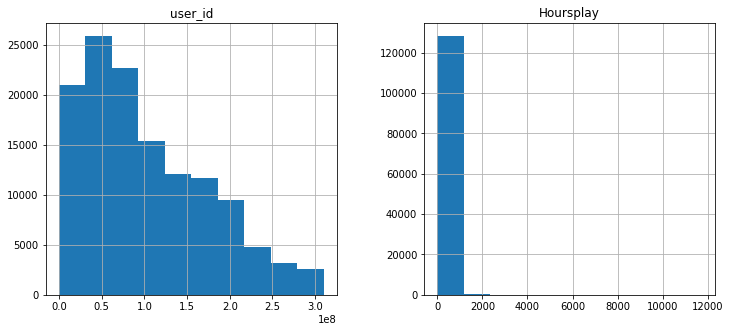

In [15]:
# Histogram using pandas 
df.hist(figsize=(12,5))

Text(0.5, 1.0, 'Status column frequency')

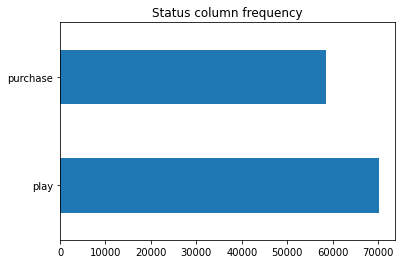

In [16]:
# plotting a horizontal bar plot of column status
df['Status'].value_counts().plot.barh().set_title('Status column frequency')

<AxesSubplot:>

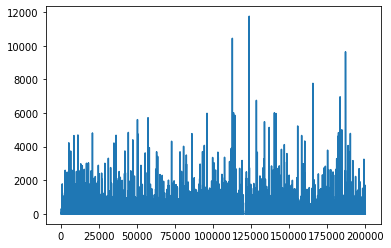

In [17]:
#plotting a count plot of hoursplay column
df['Hoursplay'].plot()

<AxesSubplot:>

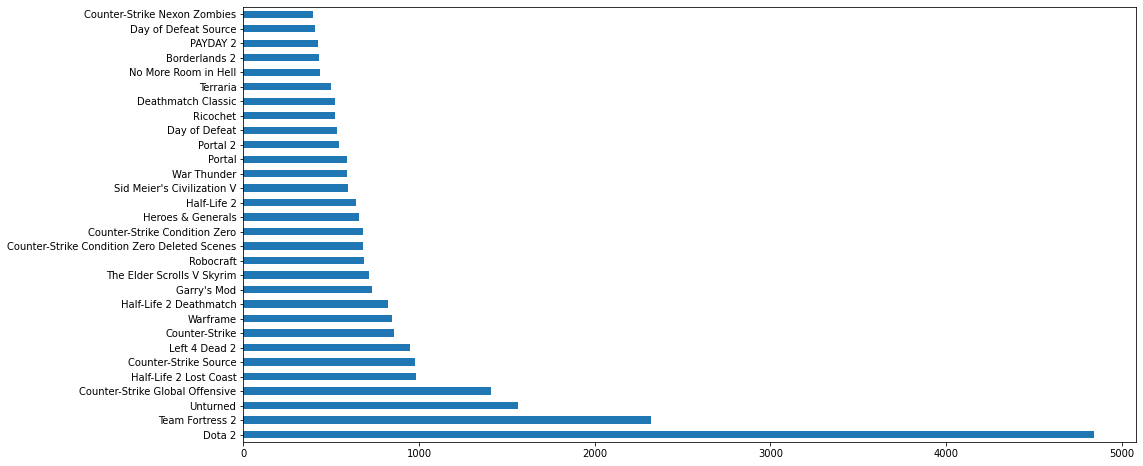

In [18]:
# plotting a horizontal bar plot of games column for top 30 games
df['games'].value_counts().head(30).plot(kind='barh',figsize=(16,8))

<AxesSubplot:xlabel='Status', ylabel='Hoursplay'>

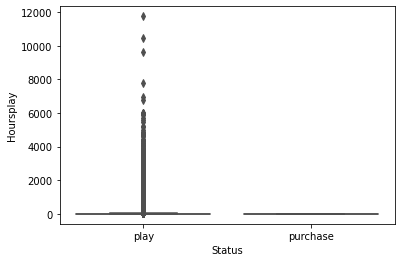

In [19]:
# plotting a boxplot of status as x-axis and hoursplay as y-axis
sns.boxplot(x='Status',y='Hoursplay',data=df,palette='rainbow')

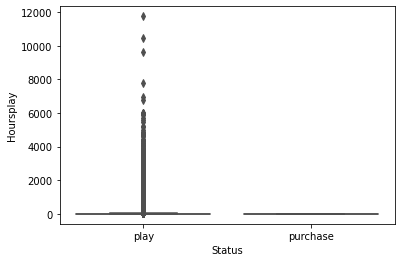# converting hours to rating

In [26]:
# comverting the hoursplay into rating
df=df[(df['Hoursplay']>=2)&(df['Status']=='play')]
df_fil=df[df.groupby('games').user_id.transform(len)>=20]
df_fil['games'].nunique()
df_fil.head(20)

df['user_id']=df_fil['user_id'].astype(str)
avg=df_fil.groupby(['games'],as_index=False).Hoursplay.mean()
avg['avg_Hoursplay']=avg['Hoursplay']
avg.drop('Hoursplay',axis=1,inplace=True)

final_ratings=pd.merge(df_fil,avg[['games','avg_Hoursplay']],on='games')

conditions=[
    (final_ratings['Hoursplay']>=0.8*final_ratings['avg_Hoursplay']),
    (final_ratings['Hoursplay']>=0.6*final_ratings['avg_Hoursplay']) &
    (final_ratings['Hoursplay']<0.8*final_ratings['avg_Hoursplay']),
    (final_ratings['Hoursplay']>=0.4*final_ratings['avg_Hoursplay']) &
    (final_ratings['Hoursplay']<0.6*final_ratings['avg_Hoursplay']),
     (final_ratings['Hoursplay']>=0.2*final_ratings['avg_Hoursplay'])&
    (final_ratings['Hoursplay']<0.4*final_ratings['avg_Hoursplay']),
    final_ratings['Hoursplay']>=0]
values=[5,4,3,2,1]

final_ratings['rating']=np.select(conditions,values)
final_ratings


,user_id,games,Status,Hoursplay,avg_Hoursplay,rating
0,151603712,The Elder Scrolls V Skyrim,play,273.0,115.351792,5
1,59945701,The Elder Scrolls V Skyrim,play,58.0,115.351792,3
2,92107940,The Elder Scrolls V Skyrim,play,110.0,115.351792,5
3,250006052,The Elder Scrolls V Skyrim,play,465.0,115.351792,5
4,11373749,The Elder Scrolls V Skyrim,play,220.0,115.351792,5
...,...,...,...,...,...,...
36415,51822361,"Warhammer 40,000 Dawn of War Soulstorm",play,23.0,14.109091,5
36416,38317154,"Warhammer 40,000 Dawn of War Soulstorm",play,5.5,14.109091,2
36417,36404933,"Warhammer 40,000 Dawn of War Soulstorm",play,5.8,14.109091,3
36418,87201181,"Warhammer 40,000 Dawn of War Soulstorm",play,24.0,14.109091,5


In [27]:
# keeping only important columns( user_id, games,rating ) drop everthing else 
final_ratings1=final_ratings[['user_id','games','rating']]
final_ratings1

,user_id,games,rating
0,151603712,The Elder Scrolls V Skyrim,5
1,59945701,The Elder Scrolls V Skyrim,3
2,92107940,The Elder Scrolls V Skyrim,5
3,250006052,The Elder Scrolls V Skyrim,5
4,11373749,The Elder Scrolls V Skyrim,5
...,...,...,...
36415,51822361,"Warhammer 40,000 Dawn of War Soulstorm",5
36416,38317154,"Warhammer 40,000 Dawn of War Soulstorm",2
36417,36404933,"Warhammer 40,000 Dawn of War Soulstorm",3
36418,87201181,"Warhammer 40,000 Dawn of War Soulstorm",5


# MEMORY BASED COLLABORATIVE FILTERING



In [32]:
#importing pairwise_distances, cosine, corelation
from sklearn.metrics import pairwise_distances
from scipy.spatial.distance import cosine,correlation
import math

In [36]:
# creating pivot table containing user_id as index, games as columns, ratings as values
piv=final_ratings1.pivot_table(index=['user_id'],columns=['games'],values='rating')

In [37]:
#checking shape of pivot table
print(piv.shape)
#check first five rows of pivot table
piv.head(5)

(8309, 427)


games,7 Days to Die,APB Reloaded,ARK Survival Evolved,Ace of Spades,AdVenture Capitalist,Aftermath,Age of Chivalry,Age of Empires II HD Edition,Age of Empires III Complete Collection,Age of Mythology Extended Edition,...,"Warhammer 40,000 Dawn of War II - Chaos Rising","Warhammer 40,000 Space Marine",Wasteland 2,Watch_Dogs,Wolfenstein The New Order,Worms Reloaded,Worms Revolution,XCOM Enemy Unknown,Zombie Panic Source,theHunter
user_id,,,,,,,,,,,,,,,,,,,,,
100053304,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100057229,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100070732,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100096071,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100168166,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [39]:
## Note: As we are subtracting the mean from each rating to standardize
##all users with only one rating or who had rated everything the same will be dropped
# Normalizing the values in pivot table
piv_norm=piv.apply(lambda x: (x-np.mean(x))/(np.max(x)-np.min(x)),axis=1)


# Dropping all columns containing only zeros representing users who did not rate
piv_norm.fillna(0,inplace=True)
piv_norm=piv_norm.T
piv_norm=piv_norm.loc[:,(piv_norm !=0).any(axis=0)]

In [40]:
# importing scipy, operator
import scipy as sp
from sklearn.metrics.pairwise import cosine_similarity
import operator

In [41]:
# converting the data into sparse matrix format to be read by the following functions
piv_sparse=sp.sparse.csr_matrix(piv_norm.values)


In [42]:
# creating matrices to show the computed cosine similarity values between each user/user array pair and item/item array pair.
item_similarity=cosine_similarity(piv_sparse)
user_similarity=cosine_similarity(piv_sparse.T)


In [45]:
# Inserting the similarity matricies into dataframe objects

#item similarity dataframe
item_sim_df=pd.DataFrame(item_similarity,index=piv_norm.index,columns=piv_norm.index)

#user similarity dataframe
user_sim_df=pd.DataFrame(user_similarity,index=piv_norm.columns,columns=piv_norm.columns)


In [59]:
# writing a function which will return the top 10 games with the highest cosine similarity value

def top_game(game):
    count=1
    print('similar games to {} include :\n'.format(game))
    for item in item_sim_df.sort_values(by=game,ascending=False).index[1:11]:
        print('No .{} :{}'.format(count,item))
        count += 1



In [60]:
top_game('Aftermath')

similar games to Aftermath include :

No .1 :Alice Madness Returns
No .2 :Shadow Warrior
No .3 :Brtal Legend
No .4 :Resident Evil 5 / Biohazard 5
No .5 :Infestation Survivor Stories
No .6 :Call of Juarez Gunslinger
No .7 :The Walking Dead Season Two
No .8 :Counter-Strike Nexon Zombies
No .9 :Star Conflict
No .10 :L.A. Noire


In [61]:
# checking the column of pivot table
piv_norm.columns

Index(['100057229', '100096071', '100311267', '100322840', '100351493',
       '100359523', '100431715', '100444456', '100519466', '100630947',
       ...
       '994489', '9946133', '99484728', '99640715', '99704390', '99711581',
       '99713453', '99723205', '99766416', '99802512'],
      dtype='object', name='user_id', length=3056)

In [78]:
# writing a function which will return the top 5 users with the highest similarity value 

def top_users(user):
    
    if user not in piv_norm.columns:
        return('No data available on user {}'.format(user))
    
    print('Most Similar users :\n')
    sim_values = user_sim_df.sort_values(by=user, ascending=False).loc[:,user].tolist()[1:11]
    sim_users = user_sim_df.sort_values(by=user, ascending=False).index[1:11]
    zipped = zip(sim_users, sim_values,)
    for user, sim in zipped:
        print('User #{0}, Similarity value:{1:.2f}' .format(user, sim))
    


In [79]:
top_users('99484728')

Most Similar users :

User #40289887, Similarity value:0.73
User #185494712, Similarity value:0.71
User #16710264, Similarity value:0.71
User #20566124, Similarity value:0.67
User #49769103, Similarity value:0.67
User #15702351, Similarity value:0.65
User #161139120, Similarity value:0.59
User #202057920, Similarity value:0.58
User #57271785, Similarity value:0.58
User #33993318, Similarity value:0.58


In [92]:
# writing a function which constructs a list of lists containing the highest rated games per similar user
# and returns the name of the game along with the frequency it appears in the list

def similar_user_recs(user):
    
    if user not in piv_norm.columns:
        return('No data available on user {}'.format(user))
    
    sim_users = user_sim_df.sort_values(by=user,ascending=False).index[1:11]
    
    best=[]
    most_common = {}
    
    for i in sim_users:
        max_score = piv_norm.loc[:, i].max()
        best.append(piv_norm[piv_norm.loc[:, i]==max_score].index.tolist())
    for i in range(len(best)):
        for j in best[i]:
            if j in most_common:
                most_common[j] += 1
            else :
                most_common[j] = 1
    sorted_list = sorted(most_common.items(), key=operator.itemgetter(1),reverse=True)
    return sorted_list[:5]


In [93]:

similar_user_recs('100519466')

[('Robocraft', 6),
 ('BLOCKADE 3D', 2),
 ("Garry's Mod", 2),
 ('ARK Survival Evolved', 1),
 ('Dino D-Day', 1)]

# COLLABORATIVE FILTERING USING KNN



In [96]:
# importing NearestNeighbors
from sklearn.neighbors import NearestNeighbors
#making an object for the NearestNeighbors Class.
model_knn = NearestNeighbors(metric='cosine',algorithm='brute', n_neighbors=20, n_jobs =1)

# fitting the dataset
model_knn.fit(piv_norm)

NearestNeighbors(algorithm='brute', metric='cosine', n_jobs=1, n_neighbors=20)


Test model and make some recommendations:

In [104]:
# choosing random game
query_index= np.random.choice(piv_norm.shape[0])
# printing the name of random game
print('Choosen game is:',piv_norm.index[query_index])

# using kNnormalgorithm to measures distance to determine the closeness of instances.
distances, indices = model_knn.kneighbors(piv_norm.iloc[query_index, :].values.reshape(1, -1), n_neighbors = 6)


# picking most popular games among the neighbors and print their names

for i in range(0, len(distances.flatten())):
    if i == 0:
        print('Recommendations for {0} :\n'.format(piv_norm.index[query_index]))
    else:
        print('{0}: {1}, with distance of {2}:'.format(i, piv_norm.index[indices.flatten()[i]], distances.flatten()[i]))
    

Choosen game is: Alien Swarm
Recommendations for Alien Swarm :

1: Assassin's Creed II, with distance of 0.8810562859363501:
2: S.T.A.L.K.E.R. Shadow of Chernobyl, with distance of 0.8932917362443583:
3: Grand Theft Auto Episodes from Liberty City, with distance of 0.9030129967151654:
4: Titan Quest Immortal Throne, with distance of 0.9108182274536735:
5: Shadow Warrior, with distance of 0.9143139995800195:


C:\Python 3.10\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(


#Conclusion

We can use different different methods based on our problem statement and dataset. Here we used collaborative filtering technique to recommend games.We can use this method to recommend alot of other things as well such as music, movies, books, news etc. 